<font size="25">Fake News Detection Project</font>  
by Austin Willoughby and Victoria Mullin

This project represents an effort to classify fake news (i.e. news created with the intent of spreading disinformation) with natural language processing (NLP) and modern machine learning algorithms.  95% classification accuracy was obtained.

# NLP Preprocessing and Data Exploration

## Import Libraries for Text Preprocessing

In [15]:
# Import libraries for text preprocessing
import re
import nltk
import pandas as pd
import pandas

# load in data
dataset = pd.read_csv('train.csv').fillna(' ')
dataset = dataset[dataset['text'].notna()].fillna(' ')
# test['total']=test['title']+' '+test['author']+' '+test['text']
dataset['total']=dataset['title']+' '+dataset['author']+' '+dataset['text']

In [16]:
#Get word count for each article
dataset['word_count'] = dataset['text'].apply(lambda x: len(str(x).split(" ")))
dataset.head()

,id,title,author,text,label,total,word_count
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,820
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",727
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...,1266
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...,559
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...,154


## Data Exploration

In [3]:
#Word count stats
dataset.word_count.describe()

count    20800.000000
mean       773.204038
std        881.466808
min          1.000000
25%        273.000000
50%        565.000000
75%       1070.000000
max      24234.000000
Name: word_count, dtype: float64

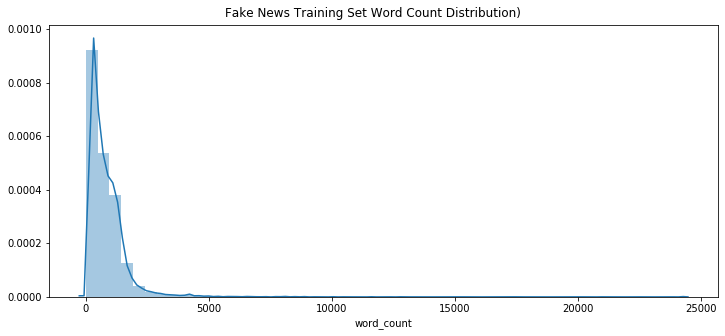

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))
sns.distplot(dataset.word_count)
fig.suptitle('Fake News Training Set Word Count Distribution)', y=0.93);

In [5]:
#Identify common words
freq_words = pd.Series(' '.join(dataset['text']).split()).value_counts()[:20]
freq_words

the     813459
to      418509
of      414147
and     360716
a       343106
in      278907
that    195915
is      150340
for     135699
on      120956
was      99763
with     97553
as       88814
The      88368
he       74838
by       73429
have     70890
are      70682
it       70263
be       69272
dtype: int64

## Text Preprocessing

In [6]:
#Import Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

lem = WordNetLemmatizer()
stem = PorterStemmer()

example = "subjectively"

print("stemming:",stem.stem(example))
print("lemmatization:", lem.lemmatize(example, "v"))

stemming: subject
lemmatization: subjectively


In [7]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [8]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))##Creating a list of custom stopwords
new_words = ['said', 'would', 'could', "also", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [9]:
#Preprocess dataset into corpus
corpus = []
for i in range(len(list(dataset.index.values))):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])

    #Convert to lowercase
    text = text.lower()

    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)

    ##Convert to list from string
    text = text.split()

    ##Stemming
    ps=PorterStemmer()    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [17]:
#View corpus item
corpus[4]

'print iranian woman sentenced six year prison iran revolutionary guard searched home found notebook contained fictional story written woman stoned death according eurasia review golrokh ebrahimi iraee wife political prisoner arash sadeghi serving year prison sentence human right activist publication reported intelligence unit revolutionary guard came arrest husband raided apartment without warrant found draft story ebrahimi iraee written article stated confiscated draft story stoning woman death adultery never published never presented anyone article stated narrative followed story protagonist watched movie stoning woman islamic law adultery'

# Data Visualization

## WordCloud Visualization

In [12]:
#Import libraries to process data for visualization
from sklearn.feature_extraction.text import CountVectorizer
import re

cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [20]:
#Separate corpus into fake news and real news
corpus_label = pd.DataFrame(corpus, columns = ['corpus'])
corpus_label['label'] = dataset.label
fake_news_corpus = corpus_label[corpus_label['label'] == 1]['corpus']
real_news_corpus = corpus_label[corpus_label['label'] == 0]['corpus']

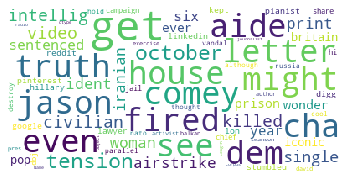

In [22]:
#Create a word cloud visualization for fake news
import wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

%matplotlib inline

wordcloud_fake_news = WordCloud(background_color='white', stopwords=stop_words, max_words=100, max_font_size=50, random_state=42).generate(str(fake_news_corpus))

print(wordcloud_fake_news)
fig = plt.figure(1)
plt.imshow(wordcloud_fake_news)
plt.axis('off')
plt.show()
fig.savefig("wordcloud_fake_news.png", dpi=900)

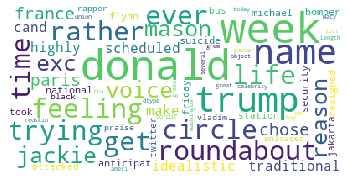

In [23]:
#Create a word cloud visualization for real news
%matplotlib inline

wordcloud_real_news = WordCloud(background_color='white', stopwords=stop_words, max_words=100, max_font_size=50, random_state=42).generate(str(real_news_corpus))

print(wordcloud_real_news)
fig = plt.figure(1)
plt.imshow(wordcloud_real_news)
plt.axis('off')
plt.show()
fig.savefig("wordcloud_real_news.png", dpi=900)

## Word Count Visualization

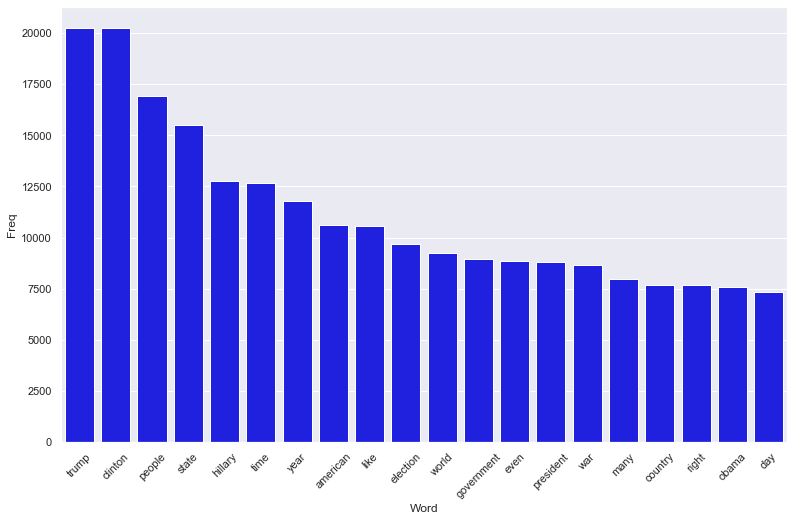

In [24]:
#Visualize most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words_fake = get_top_n_words(fake_news_corpus, n=20)
top_fake_df = pd.DataFrame(top_words_fake)
top_fake_df.columns=["Word", "Freq"]#Barplot of most freq words

top_words_real = get_top_n_words(real_news_corpus, n=20)
top_real_df = pandas.DataFrame(top_words_real)
top_real_df.columns=["Word", "Freq"]#Barplot of most freq words


import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_fake_df, color='blue')
g.set_xticklabels(g.get_xticklabels(), rotation=45);

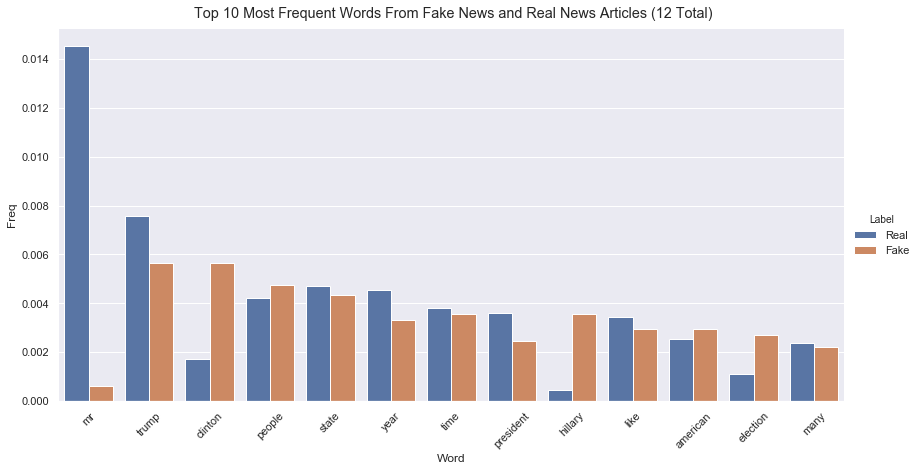

In [25]:
#Visualize most frequently occuring words for fake news and real news
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    total_words = sum_words.sum(axis=1)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    top10_words= ['mr', 'trump', 'clinton', 'people', 'state', 'year','time', 'president', 
                   'hillary', 'like', 'american', 'election', 'many'] #these are the top 10 words from each dataset
    top10_words_values = []
    for i in words_freq:
        if i[0] in top10_words:
            top10_words_values.append([i[0],i[1]])
#     return words_freq[:n], total_words
    return top10_words_values, total_words

#Convert most freq words to dataframe for plotting bar plot
top_words_fake, total_words = get_top_n_words(fake_news_corpus, n=10)
# top_words_fake = get_top_n_words(fake_news_corpus, n=10)
top_fake_df = pandas.DataFrame(top_words_fake)
top_fake_df.columns=["Word", "Freq"]#Barplot of most freq words
top_fake_df['Freq'] = top_fake_df['Freq']/int(total_words)

# top_words_real = get_top_n_words(real_news_corpus, n=10)
top_words_real, total_words = get_top_n_words(real_news_corpus, n=10)
top_real_df = pandas.DataFrame(top_words_real)
top_real_df.columns=["Word", "Freq"]#Barplot of most freq words
top_real_df['Freq'] = top_real_df['Freq']/int(total_words)

top_fake_df['Label'] = 'Fake'
top_real_df['Label'] = 'Real'

top_df_labelled = pd.concat([top_fake_df,top_real_df]).sort_values('Freq', ascending=False)

g=sns.catplot(x='Word', y='Freq', hue='Label', data=top_df_labelled, kind='bar', height = 6, aspect = 2)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Top 10 Most Frequent Words From Fake News and Real News Articles (12 Total)',y=1.02);

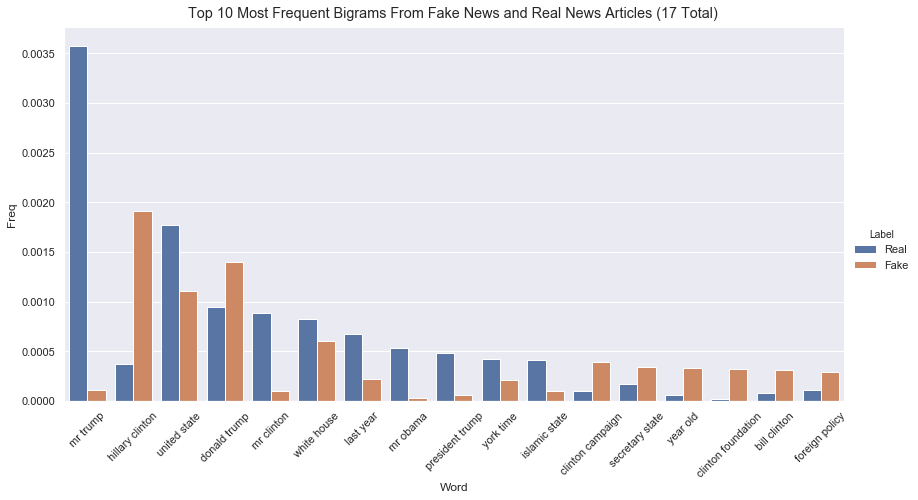

In [26]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    total_words = sum_words.sum(axis=1)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    top10_bigrams= ['mr trump','hillary clinton','united state','donald trump','mr clinton','white house',
                    'last year','mr obama','president trump','york time','islamic state',
                    'clinton campaign','secretary state','year old','clinton foundation',
                    'bill clinton','foreign policy'] #these are the top 10 bigrams from each dataset
    top10_bigrams_values = []
    for i in words_freq:
        if i[0] in top10_bigrams:
            top10_bigrams_values.append([i[0],i[1]])
#     return words_freq[:n], total_words
    return top10_bigrams_values, total_words

#Convert most freq words to dataframe for plotting bar plot
top_words_fake, total_words = get_top_n_words(fake_news_corpus, n=10)
# top_words_fake = get_top_n_words(fake_news_corpus, n=10)
top_fake_df = pandas.DataFrame(top_words_fake)
top_fake_df.columns=["Word", "Freq"]#Barplot of most freq words
top_fake_df['Freq'] = top_fake_df['Freq']/int(total_words)

# top_words_real = get_top_n_words(real_news_corpus, n=10)
top_words_real, total_words = get_top_n_words(real_news_corpus, n=10)
top_real_df = pandas.DataFrame(top_words_real)
top_real_df.columns=["Word", "Freq"]#Barplot of most freq words
top_real_df['Freq'] = top_real_df['Freq']/int(total_words)

top_fake_df['Label'] = 'Fake'
top_real_df['Label'] = 'Real'

top_df_labelled = pd.concat([top_fake_df,top_real_df]).sort_values('Freq', ascending=False)

g=sns.catplot(x='Word', y='Freq', hue='Label', data=top_df_labelled, kind='bar', height = 6, aspect = 2)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Top 10 Most Frequent Bigrams From Fake News and Real News Articles (17 Total)',y=1.02);

## TF-IDF Visualization

In [13]:
#Visualize TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[5]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [14]:
#Visualize TF-IDF
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=20):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

#sort the tf-idf vectors by descending order of scores

sorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10

keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\nText:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])
    
    


Text:
trying time jackie mason voice reason week exclusive clip breitbart news jackie discus looming threat north korea explains president donald trump win support hollywood left u need strike first decides bomb whole country behind everybody realize choice thing jackie say except hollywood left get nauseous trump win left fall love minute bombed better reason jackie explains like transgender toilet jackie say surprise hollywood celebrity support trump strike syrian airfield month infuriated say might save life mean anything saved environment climate change happiest people world still jackie say got nothing hollywood celebs got tough life country watch jackie latest clip follow daniel nussbaum twitter dznussbaum

Keywords:
hollywood 0.394
clip 0.232
trump win 0.22
explains 0.204
strike 0.18
say 0.175
left 0.172
mason 0.146
save life 0.139
win 0.139


# Bag of Words Creation

In [18]:
#With the corpus fully preprocessed it can now be processed into the bag of words model
#tfidf
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 3))
counts = count_vectorizer.fit_transform(np.array(corpus))
tfidf = transformer.fit_transform(counts)

In [19]:
tfidf.shape #note 11 million columns!

(20800, 11189661)

In [33]:
targets = dataset['label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, targets, random_state=0)

# Model Creation

## SVC Type I: c-SVC Model

In [34]:
from sklearn import svm
from sklearn import metrics
clf = svm.SVC(C=3)
clf.fit(X_train, y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
svm_accuracy = metrics.accuracy_score(y_test, y_pred)
svm_accuracy

0.9488461538461539

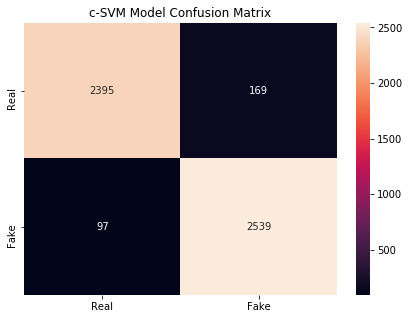

In [37]:
import sklearn
SVM_cm = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(SVM_cm, annot=True, yticklabels=['Real', 'Fake'], fmt='d', xticklabels=['Real', 'Fake'])
ax.set_title('c-SVM Model Confusion Matrix');

In [38]:
from sklearn.metrics import classification_report
print('                      c-SVM Results')
print(metrics.classification_report(y_test, y_pred))

                      c-SVM Results
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2564
           1       0.94      0.96      0.95      2636

    accuracy                           0.95      5200
   macro avg       0.95      0.95      0.95      5200
weighted avg       0.95      0.95      0.95      5200



## SVC Type II: nu-SVC Model

In [44]:
nu_clf = svm.NuSVC()#Grid search optimal value for nu-SVC was 0.5, which is the default value
nu_clf.fit(X_train, y_train)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [45]:
y_pred_nu = nu_clf.predict(X_test)
print('                     nu-SVM Results')
print(metrics.classification_report(y_test, y_pred_nu))


                     nu-SVM Results
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2564
           1       0.93      0.96      0.94      2636

    accuracy                           0.94      5200
   macro avg       0.94      0.94      0.94      5200
weighted avg       0.94      0.94      0.94      5200



In [48]:
nu_svm_accuracy = metrics.accuracy_score(y_test, y_pred_nu)
nu_svm_accuracy

0.9426923076923077

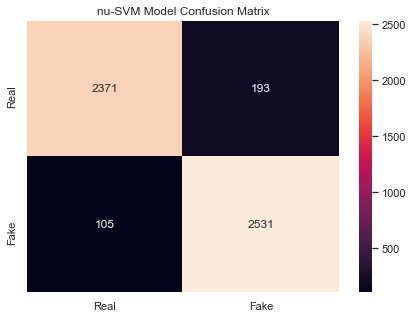

In [47]:
nuSVM_cm = sklearn.metrics.confusion_matrix(y_test, y_pred_nu, labels=None, sample_weight=None, normalize=None)
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(nuSVM_cm, annot=True, yticklabels=['Real', 'Fake'], fmt='d', xticklabels=['Real', 'Fake'])
ax.set_title('nu-SVM Model Confusion Matrix');

## Multinomial Naive Bayes Model

In [21]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# y_pred_NB = gnb.fit(X_train, y_train).predict(X_test)
from sklearn.naive_bayes import MultinomialNB

Multi_NB = MultinomialNB()
y_pred_NB = Multi_NB.fit(X_train, y_train).predict(X_test)

In [24]:
from sklearn import svm
from sklearn import metrics
print('                     Multi-NB Results')
print(metrics.classification_report(y_test, y_pred_NB))

                     Multi-NB Results
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2564
           1       1.00      0.68      0.81      2636

    accuracy                           0.84      5200
   macro avg       0.88      0.84      0.84      5200
weighted avg       0.88      0.84      0.84      5200



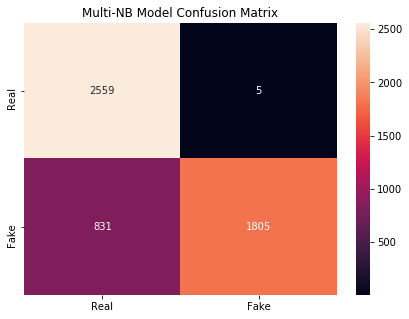

In [32]:
import sklearn
NB_cm = sklearn.metrics.confusion_matrix(y_test.reshape((5200,1)), y_pred_NB.reshape((5200,1)), labels=None, sample_weight=None, normalize=None)
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(NB_cm, annot=True, yticklabels=['Real', 'Fake'], fmt='d', xticklabels=['Real', 'Fake'])
ax.set_title('Multi-NB Model Confusion Matrix');

In [49]:
NB_accuracy = metrics.accuracy_score(y_test, y_pred_NB)
NB_accuracy

0.8392307692307692

## Model Grid Search

Note that due to the processing time of these grid searches the nu-SVM grid search was completed in
a different notebook.

In [50]:
#Note that due to the processing time of these grid searches the nu-SVM grid search was completed in
#a different notebook
from sklearn.model_selection import GridSearchCV
parameters = {'C':[1, 3, 10, 30, 100, 300, 1000]}
svc_grid = svm.SVC()
clf_grid = GridSearchCV(svc_grid, parameters)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 3, 10, 30, 100, 300, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
pd.DataFrame(clf_grid.cv_results_)[['param_C','mean_test_score','rank_test_score']]

,param_C,mean_test_score,rank_test_score
0,1,0.940256,7
1,3,0.944679,1
2,10,0.944679,1
3,30,0.944679,1
4,100,0.944679,1
5,300,0.944679,1
6,1000,0.944679,1


# Result Visualizations

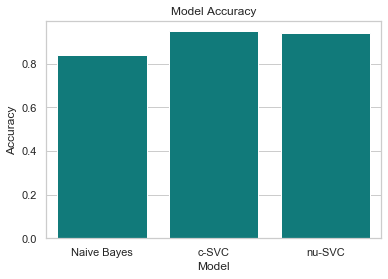

In [39]:
model_accuracy = [0.839,0.949,0.943]
model_type = ['Naive Bayes','c-SVC','nu-SVC']
df_accuracy = pd.DataFrame(model_accuracy,columns = ['Accuracy'])
df_accuracy['Model'] = model_type
df_accuracy
sns.set(style="whitegrid")
ax = sns.barplot(x="Model", y="Accuracy", data=df_accuracy, color = 'darkcyan').set_title('Model Accuracy')


In [40]:
SVM_nu_cm = [[2371,193],[105,2531]]
SVM_cm_list = [[2395,  169],[  97, 2539]]
Multi_NB_list = [[2559,    5],[ 831, 1805]]

In [42]:
list_all = [Multi_NB_list ,SVM_cm_list,SVM_nu_cm]
fp_list = []
fn_list=[]
total_articles = 2559 + 5+831+1805
for i in list_all:
    false_positive = i[0][1]/total_articles#(i[0][0]+i[0][1])
    false_negative = i[1][0]/total_articles#(i[1][0]+i[1][1])
    fp_list.append(false_positive)
    fn_list.append(false_negative)

<Figure size 1440x720 with 0 Axes>

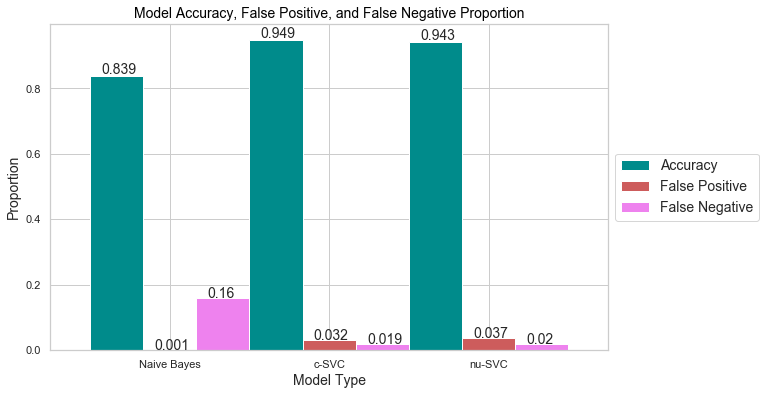

In [43]:
plt.figure(figsize=(20,10))
df_acc = pd.concat([df_accuracy,pd.DataFrame(fp_list,columns=['False Positive']),pd.DataFrame(fn_list,columns=['False Negative'])],axis=1)
fig = df_acc.set_index('Model').plot.bar(figsize=(10,6), rot=0,width=1, color=['darkcyan','indianred','violet'])
plt.title('Model Accuracy, False Positive, and False Negative Proportion', color='black',fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=14)
fig.set_ylabel("Proportion",fontsize=14)
fig.set_xlabel("Model Type",fontsize=14)
for p in fig.patches:
    fig.annotate(str(round(p.get_height(),3)), (p.get_x() + 0.07, p.get_height() * 1.005), fontsize=14)